#### Base de dados

In [1]:
import pandas as pd

In [2]:
dados = {
    'A': [1,1.5,2,1.5,-1,-0.5,0,-0.5],
    'A2': [-0.5,0,-0.5,-1,1.5,2,1.5,1],
    'B': [1,1.5,1,0.5,0,-0.5,-1,-1.5],
    'B2': [-1.5,-1,-0.5,0,0.5,1,1.5,1],
    'y': [1,1,1,1,0,0,0,0],
    'y2': [0,0,0,0,1,1,1,1]
}

dados = pd.DataFrame(dados)

In [3]:
dados_pred = {
    'A': [2.5,1.8,0.5,-1,-1],
    'B': [2,1,0,0,-1.5],
    'A2': [2.5,1.8,0.5,-1,-1],
    'B2': [2,1,0,0,-1.5]
}

dados_pred = pd.DataFrame(dados_pred)

#### Gráfico

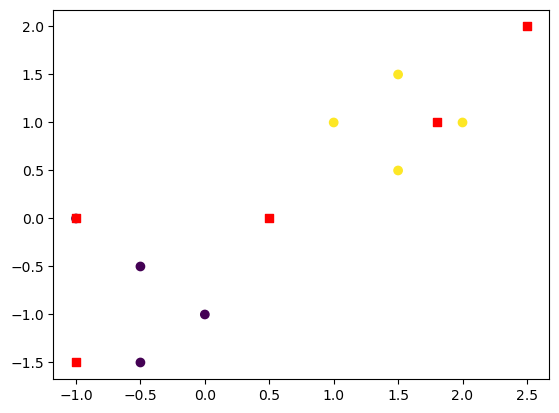

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(
    x=dados.A,
    y=dados.B,
    c=dados.y,
    cmap='viridis'
)

ax.scatter(
    x=dados_pred.A,
    y=dados_pred.B,
    c='r',
    marker='s'
)

plt.show()

#### K-Nearest Neighbors

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [7]:
X = dados[['A', 'B']]
y = dados.y

In [8]:
X_test = dados_pred[['A', 'B']]

In [9]:
neigh.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = neigh.predict(X_test)

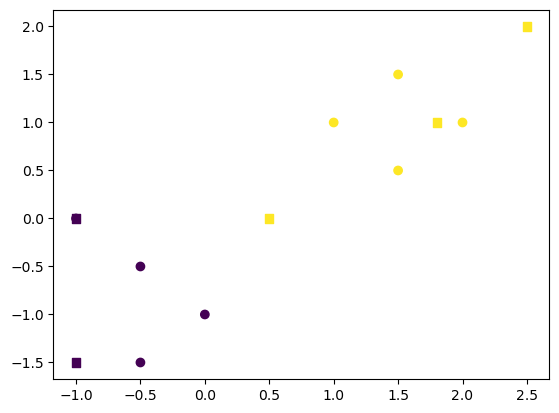

In [11]:
fig, ax = plt.subplots()

ax.scatter(
    x=dados.A,
    y=dados.B,
    c=dados.y,
    cmap='viridis'
)

ax.scatter(
    x=dados_pred.A,
    y=dados_pred.B,
    c=y_pred,
    marker='s'
)

plt.show()

#### Usando dataset iris

In [12]:
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [14]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [15]:
iris1 = iris_df.loc[iris_df.target.isin([1,2]), ['petal length (cm)', 'petal width (cm)', 'target']]
iris1.head(3)

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1


In [16]:
X = iris1[['petal length (cm)', 'petal width (cm)']]
y = iris1.target

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

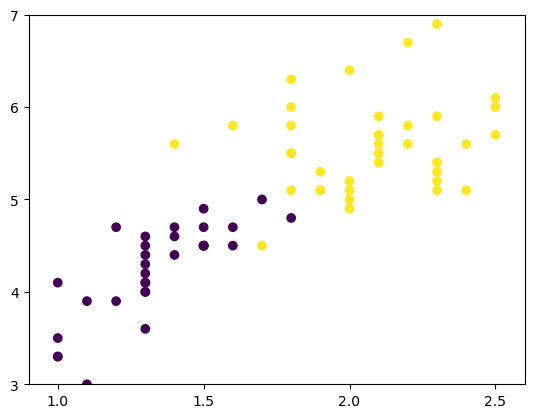

In [18]:
fig, ax = plt.subplots()

ax.scatter(
    x=X_train['petal width (cm)'],
    y=X_train['petal length (cm)'],
    c=y_train,
    cmap='viridis'
)

ax.set(
    xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5],
    ylim=(3, 7), yticks=[3,4,5,6,7],
)

plt.show()

In [19]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [20]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = neigh.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 6,  8]])

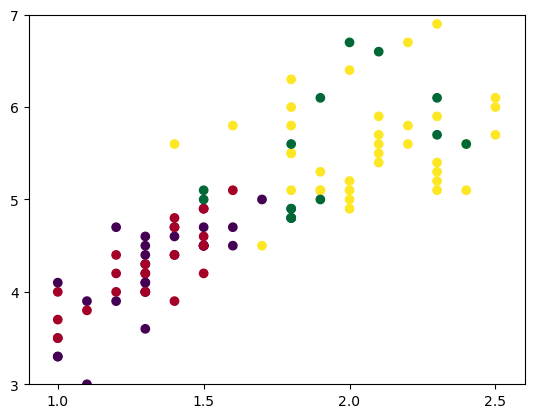

In [23]:
fig, ax = plt.subplots()

ax.scatter(
    x=X_train['petal width (cm)'],
    y=X_train['petal length (cm)'],
    c=y_train,
    cmap='viridis'
)

ax.scatter(
    x=X_test['petal width (cm)'],
    y=X_test['petal length (cm)'],
    c=y_test,
    cmap='RdYlGn'
)

ax.set(
    xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5],
    ylim=(3, 7), yticks=[3,4,5,6,7],
)

plt.show()

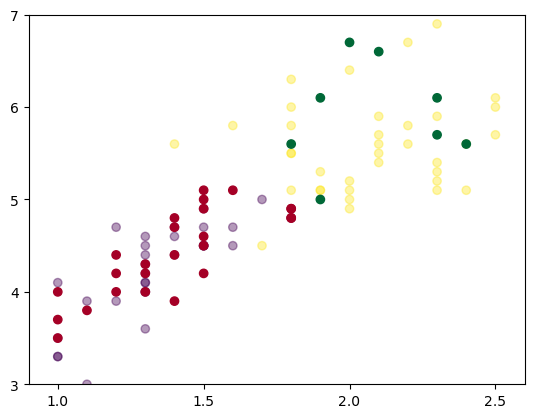

In [24]:
fig, ax = plt.subplots()

ax.scatter(
    x=X_train['petal width (cm)'],
    y=X_train['petal length (cm)'],
    c=y_train,
    alpha=0.4,
    cmap='viridis'
)

ax.scatter(
    x=X_test['petal width (cm)'],
    y=X_test['petal length (cm)'],
    c=y_pred,
    alpha=1,
    cmap='RdYlGn'
)

ax.set(
    xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5],
    ylim=(3, 7), yticks=[3,4,5,6,7],
)

plt.show()

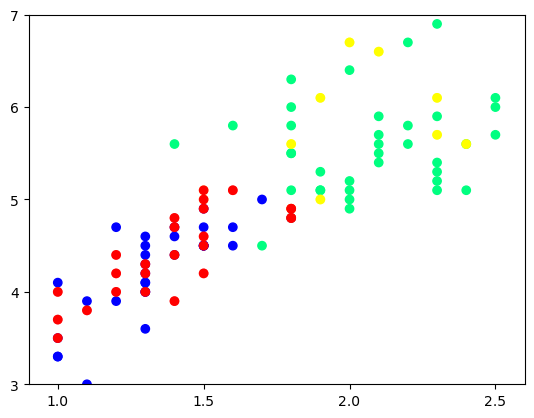

In [25]:
fig, ax = plt.subplots()

ax.scatter(
    x=X_train['petal width (cm)'],
    y=X_train['petal length (cm)'],
    c=y_train,
    alpha=1,
    cmap='winter'
)

ax.scatter(
    x=X_test['petal width (cm)'],
    y=X_test['petal length (cm)'],
    c=y_test,
    alpha=0.4,
    cmap='autumn'
)

ax.scatter(
    x=X_test['petal width (cm)'],
    y=X_test['petal length (cm)'],
    c=y_pred,
    alpha=1,
    cmap='autumn'
)

ax.set(
    xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5],
    ylim=(3, 7), yticks=[3,4,5,6,7],
)

plt.show()

In [26]:
X_test[y_test != y_pred]

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5
